<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import *
sns.set_palette('Set2')
from sklearn.metrics import confusion_matrix

# EDA 

In [ ]:
df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet')

df.head()

,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
0,0,1991.0,8.0,6.0,2.0,655.0,735.0,5.0,430.0,49.0,185.0,244.0,110.0,0.0
1,0,1990.0,11.0,19.0,1.0,1654.0,1847.0,4.0,262.0,117.0,156.0,11.0,595.0,0.0
2,0,1991.0,1.0,20.0,7.0,1700.0,1751.0,12.0,683.0,116.0,189.0,175.0,412.0,0.0
3,0,1991.0,6.0,25.0,2.0,2130.0,2303.0,3.0,618.0,96.0,180.0,11.0,545.0,0.0
4,0,1988.0,10.0,1.0,6.0,1611.0,1920.0,3.0,1630.0,126.0,226.0,171.0,866.0,0.0


In [ ]:
df.shape

(4000000, 14)

In [ ]:
df.ArrDelayBinary.value_counts()

0    3307255
1     692745
Name: ArrDelayBinary, dtype: int64

Target is `ArrDelayBinary`.

In [ ]:
df.drop(['Diverted'], axis=1, inplace=True)

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')


,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance
ArrDelayBinary,1.000000,-0.039272,-0.002223,0.005156,-0.000750,0.082825,0.094130,-0.000891,-0.029227,0.160840,-0.006576,0.005935,0.078803
t_Year,-0.039272,1.000000,-0.269420,-0.012871,-0.005014,-0.014622,0.001554,0.037195,0.086398,0.058492,0.005759,0.005791,0.043229
t_Month,-0.002223,-0.269420,1.000000,-0.002716,0.001590,-0.000680,-0.002221,-0.024098,-0.006826,-0.006849,-0.006664,-0.005636,-0.001868
DayofMonth,0.005156,-0.012871,-0.002716,1.000000,-0.001764,-0.001560,-0.001289,-0.000340,0.000859,-0.000216,0.000109,-0.000260,-0.000328
DayofWeek,-0.000750,-0.005014,0.001590,-0.001764,1.000000,0.004130,0.006393,-0.012153,0.003607,0.006683,-0.000124,0.000702,0.012555
CRSDepTime,0.082825,-0.014622,-0.000680,-0.001560,0.004130,1.000000,0.815022,0.011877,0.017228,-0.047227,-0.032341,0.014777,-0.051439
CRSArrTime,0.094130,0.001554,-0.002221,-0.001289,0.006393,0.815022,1.000000,-0.003438,0.006861,0.057020,0.007145,-0.003114,0.048443
UniqueCarrier,-0.000891,0.037195,-0.024098,-0.000340,-0.012153,0.011877,-0.003438,1.000000,-0.012814,-0.141071,0.087299,0.088300,-0.122382
FlightNum,-0.029227,0.086398,-0.006826,0.000859,0.003607,0.017228,0.006861,-0.012814,1.000000,-0.161535,0.020377,0.025645,-0.167426
ActualElapsedTime,0.160840,0.058492,-0.006849,-0.000216,0.006683,-0.047227,0.057020,-0.141071,-0.161535,1.000000,0.054247,0.076717,0.972644


In [ ]:
df1 = df.corr().unstack().sort_values(ascending=False).drop_duplicates()

In [ ]:
df1.ArrDelayBinary.head()

ActualElapsedTime    0.160840
CRSArrTime           0.094130
Distance             0.078803
DayofMonth           0.005156
DayofWeek           -0.000750
dtype: float64

In [ ]:
df1.ArrDelayBinary.tail()

CRSArrTime    0.094130
Distance      0.078803
DayofMonth    0.005156
DayofWeek    -0.000750
Origin       -0.006576
dtype: float64

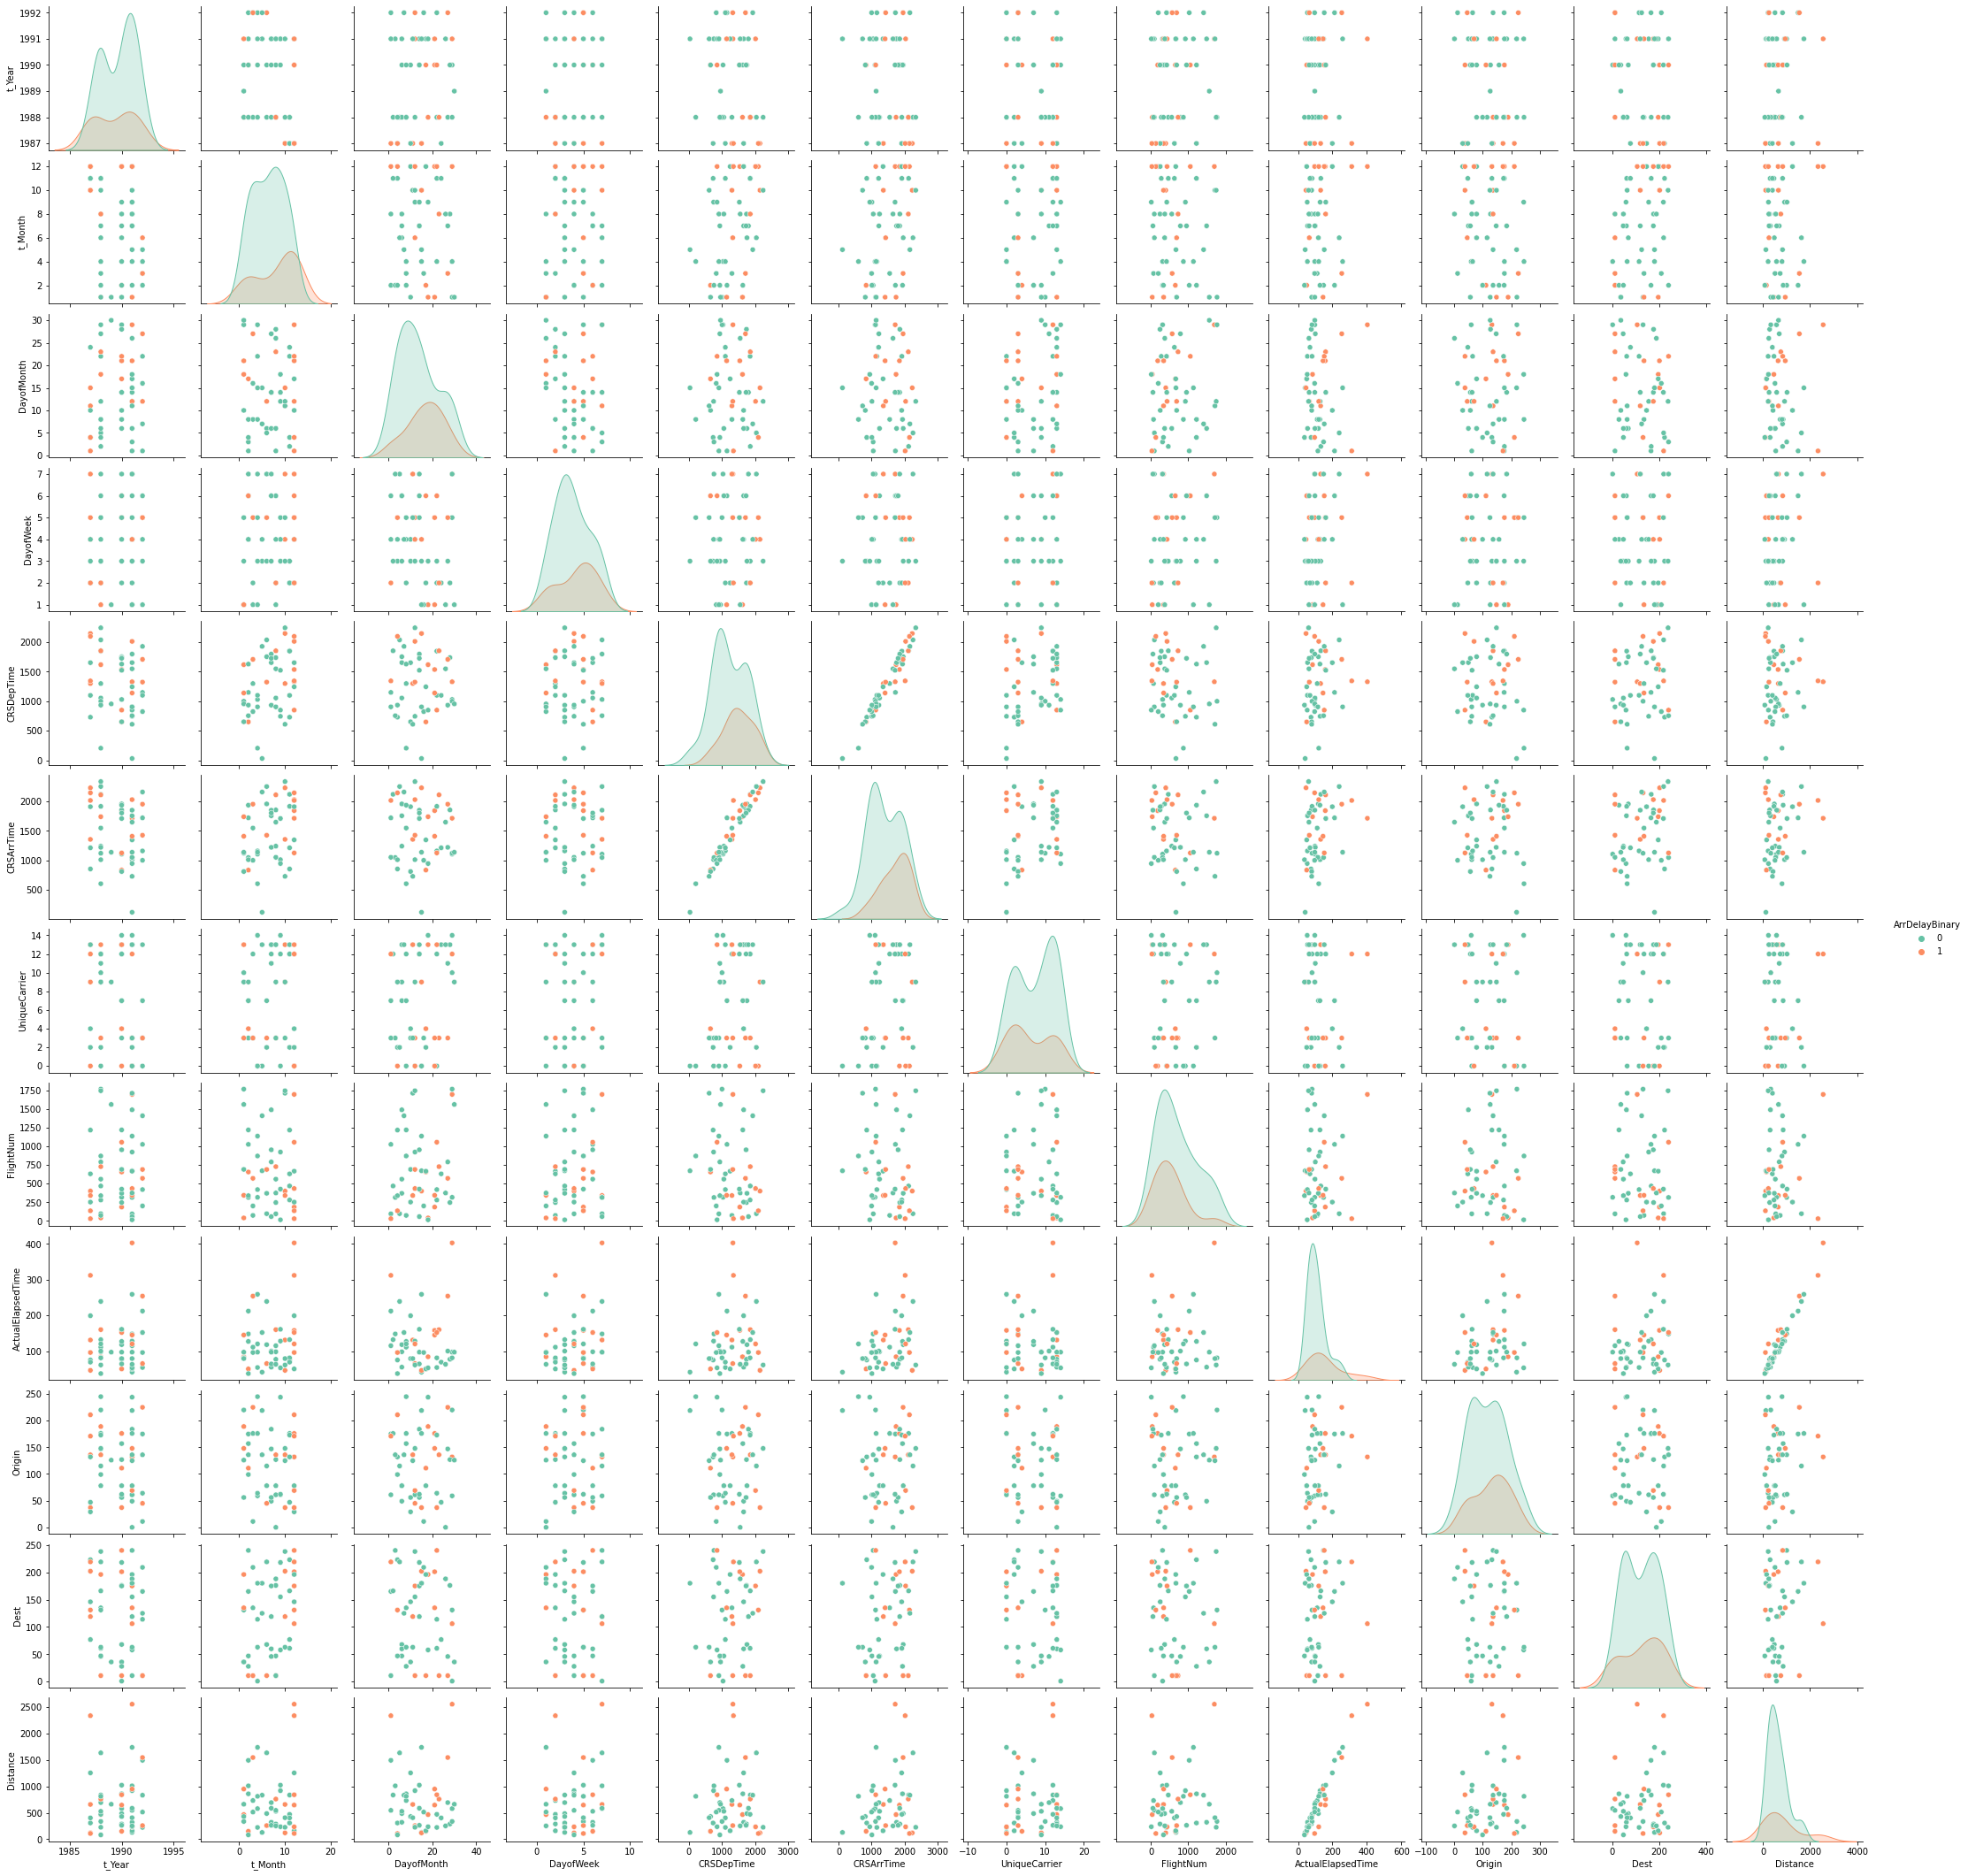

In [ ]:
sns.pairplot(df.sample(50), hue='ArrDelayBinary')

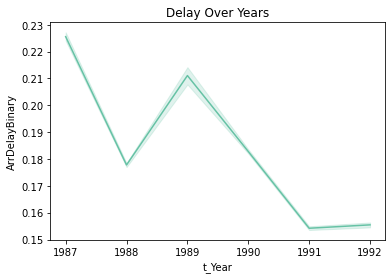

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df, x= 't_Year', y='ArrDelayBinary').set_title('Delay Over Years');

#sns.lineplot(df, x='DayofMonth', y='ArrDelayBinary').set_title("ActualElapsedTime delay")

## Data preprocessing 

In [ ]:
df.isna().sum()

ArrDelayBinary       0
t_Year               0
t_Month              0
DayofMonth           0
DayofWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
Origin               0
Dest                 0
Distance             0
dtype: int64

In [ ]:
from sklearn.model_selection import  train_test_split
X = df[['ActualElapsedTime','CRSArrTime']]
y = df.ArrDelayBinary

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

# Model Aplications
*DecisionTreeClassifier()*

In [ ]:
dtree=DecisionTreeClassifier(max_depth=4, min_samples_split=2)
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.feature_importances_

array([0.76980141, 0.23019859])

In [ ]:
pred=dtree.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
accuracy_score(y_test, pred)

0.826719

<Figure size 720x576 with 0 Axes>

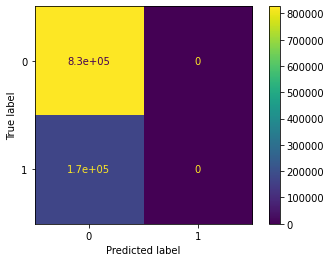

In [ ]:
plt.figure(figsize=(10,8))

plot_confusion_matrix(dtree, X_test,y_test);

## Display your decision tree with plot_tree(), Explain your tree  ..

In [35]:
df.columns

Index(['ArrDelayBinary', 't_Year', 't_Month', 'DayofMonth', 'DayofWeek',
       'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'Origin', 'Dest', 'Distance'],
      dtype='object')

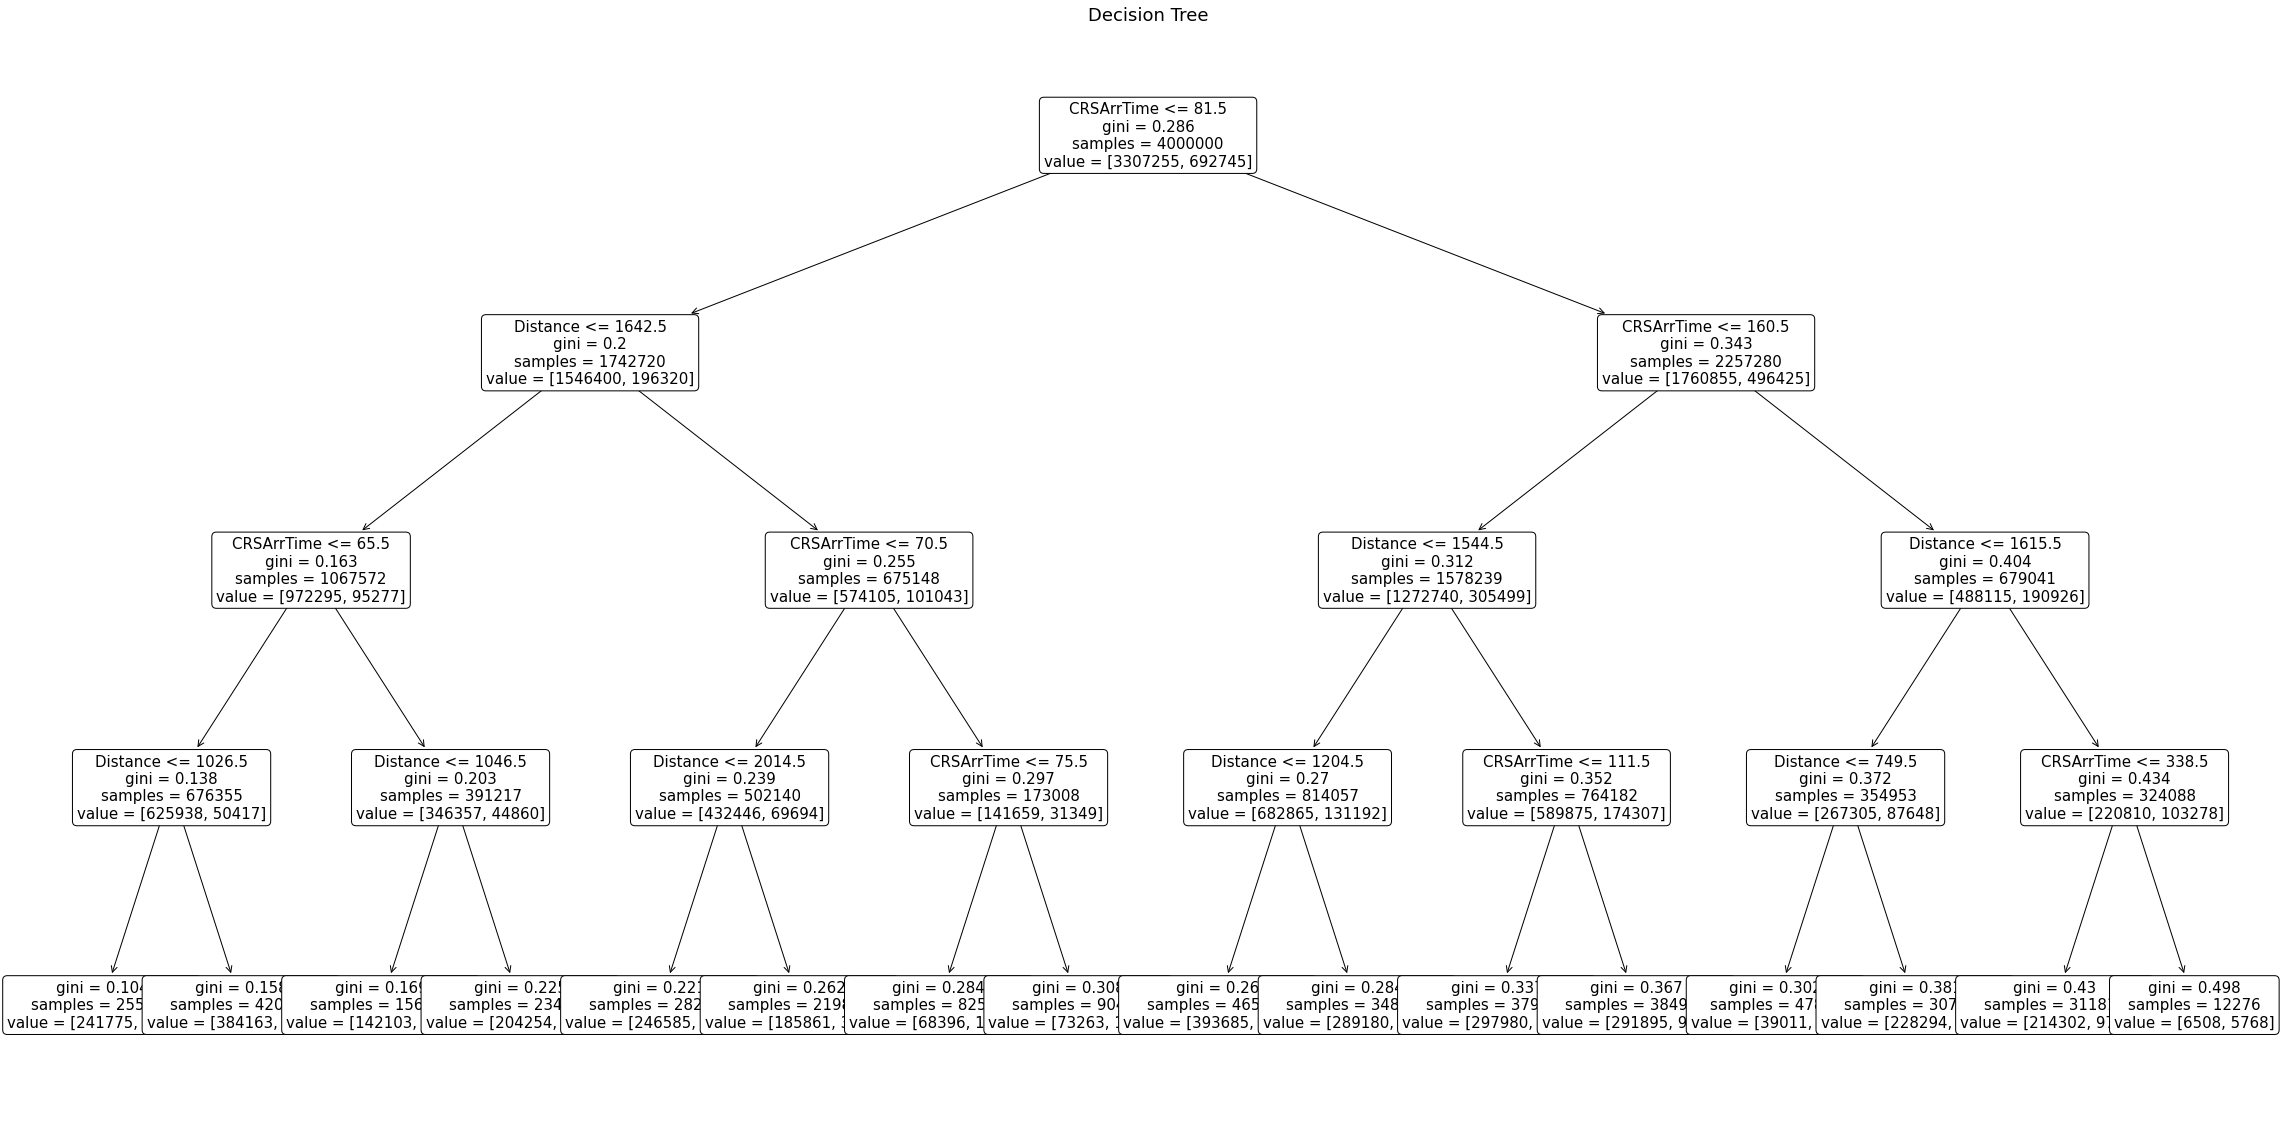

In [41]:
plt.figure(figsize=(40,20))
plot_tree(dtree, feature_names= ['CRSArrTime',  'Distance'],fontsize=15,filled=False, rounded=True);
plt.title('Decision Tree', fontsize=18);

# Bonus: RandomizedSearchCV() and GridsearchCV()

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid ={'criterion': ['gini'],
 'max_depth': [1],
 'min_samples_leaf': [1],
 'min_samples_split': [2]}

#Make GridSearchCV
grid_search =GridSearchCV(dtree, param_grid, cv=10)

In [44]:
#fit X_train and y_train into grid_search
grid_search= grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [1],
              

In [45]:
#best parameters of LogisticRegression after using GridSearchCV
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
grid_search.best_score_


0.8268453333333333

In [49]:

param_dist = {'criterion': ['entropy'],
 'max_depth': [None],
 'max_features': [1],
 'min_samples_leaf': [6]}

In [50]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(dtree, param_dist, cv=5)
tree_cv

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
             

In [51]:
tree_cv.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
             

In [52]:
tree_cv.best_score_


0.8201080000000001

In [53]:
tree_cv.best_params_


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 6}

In [54]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

preds=clf.predict(X_test)

In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, preds)*100))

Accuracy: 81.54%
